TypeError: unhashable type: 'numpy.ndarray'

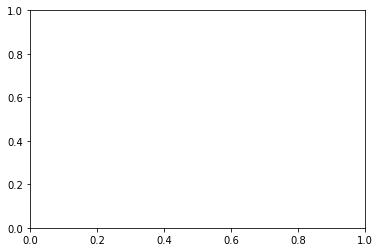

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

@author: University of Sydney Business School
         Discipline of Business Analytics
"""

# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Read data from a csv file. The file should be located in the same directory with the python script
beer_df = pd.read_csv('beer.csv', header=None)

# Plot the original series
figure1 = plt.figure()
plt.plot(beer_df)
plt.title('The Beer Consumption Data')

# Adding some NaN values to the end of the series
beer_extra = np.concatenate((beer_df[0].values, [np.NaN, np.NaN, np.NaN, np.NaN]), 0)

# Reshape the series to make each row is a year data. There are 5 years in total
yearly_data = np.reshape(beer_extra, (5,12))

# Create another figure
figure2 = plt.figure()

# Set limit for each axis
plt.xlim([0, 60])
plt.ylim([110, 200])

# Define plot styles for each year
lines = []
plot_style = ['k-', 'r-', 'g-', 'b-', 'p-']

for style in plot_style:
    lines.append(plt.plot([], [], style)[0])
    
#%% Plot data for 5 years with different color and style
def init():
    for idx, line in enumerate(lines):
        line.set_data(np.linspace(1,12,num=12)+(idx*12), yearly_data[idx])
    return lines

def animate_plot(i):
    for idx, line in enumerate(lines):
        x, y = line.get_data()
        line.set_data(x - (idx*12)*(1/12) , y)
    return lines

for i in range(12):
    beer_animation = animation.FuncAnimation(figure2, animate_plot, init_func=init, frames=12, repeat=False, interval = 250, blit=False)
    plt.show()


